## Building a model that predicts tour insurance claim status:

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset and performing EDA. 

### Read and view the dataset

In [2]:
data = pd.read_csv("insurance_part2_data-2.csv")

In [3]:
#show first 5 rows of the dataset
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Data Description:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

In [211]:
#check column names
data.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

### Removing unwanted variables

In [49]:
# remove the variables and check the data for the 10 rows 
#data = data_df.drop(['Agency_Code','Channel'], axis=1)
#data.head()

### Basic Data Exploration

In [50]:
#know total number of entries in the data
data.count()

Age             3000
Agency_Code     3000
Type            3000
Claimed         3000
Commision       3000
Channel         3000
Duration        3000
Sales           3000
Product Name    3000
Destination     3000
dtype: int64

#### There are 3000 customer details have been collected as sample. 

In [699]:
#know about the shape of data
data.shape

(2685, 7)

#### The given dataset has 3000 rows and 10 columns. 

In [25]:
#Check data types of attributes
data.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [51]:
# Checking summary statistic of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


### Observations

- 'Age' variable has minimum value 8, 75% is 42 but it has the maximum value is of 84 which is double of 75 percentile value.It shows the variable has extreme values.

- similarly 'Commision','Duration' and 'Sales' all have a large difference between 75% value and max value.Hence it seems all have outliers. 

In [702]:
#check information about the data
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2685 non-null   float64
 1   Type          2685 non-null   int8   
 2   Commision     2685 non-null   float64
 3   Duration      2685 non-null   float64
 4   Sales         2685 non-null   float64
 5   Product Name  2685 non-null   int8   
 6   Destination   2685 non-null   int8   
dtypes: float64(4), int8(3)
memory usage: 112.7 KB


#### There is no null entry in the dataset ,there is 6 object type attributes , 2 of float type and 2 of integer type.

In [120]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in data.columns: 
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes

In [704]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2685 non-null   float64
 1   Type          2685 non-null   int8   
 2   Commision     2685 non-null   float64
 3   Duration      2685 non-null   float64
 4   Sales         2685 non-null   float64
 5   Product Name  2685 non-null   int8   
 6   Destination   2685 non-null   int8   
dtypes: float64(4), int8(3)
memory usage: 112.7 KB


In [705]:
# Check for missing value in the dataset if any
data.isnull().sum().any()

False

### Check for duplicate values

In [121]:
#Checking for duplicates
data.duplicated().sum()

139

In [122]:
#Dropping duplicate values
data.drop_duplicates(keep='first',inplace=True)

In [123]:
data.shape

(2861, 10)

### The data set is reduced to 2861 rows after removing duplicate values.

In [709]:
#Checking for unique values
data.nunique()

Age              49
Type              2
Commision       253
Duration        144
Sales           259
Product Name      5
Destination       3
dtype: int64

### EDA

In [212]:
data.columns


Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

<AxesSubplot:xlabel='Claimed', ylabel='count'>

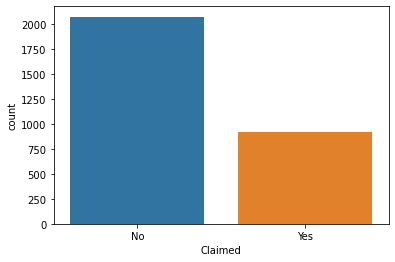

In [218]:
sns.countplot(x=data['Claimed'])

Almost half of the customers have claimed for an insurance.

<AxesSubplot:xlabel='Type', ylabel='count'>

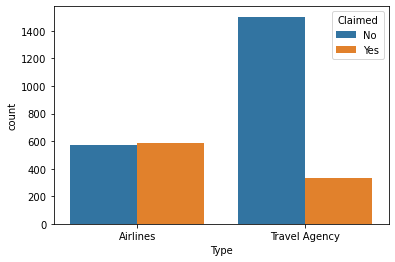

In [222]:
sns.countplot(x=data['Type'],hue=data['Claimed'])

Almost all customers from airline claim for an insurance but claiming is less than half through travel agency.

<AxesSubplot:xlabel='Channel', ylabel='count'>

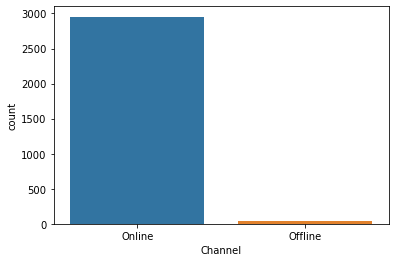

In [215]:
sns.countplot(x=data['Channel'])

Very less customers claim insurance offline.

In [4]:
data["Type"].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [5]:
data["Agency_Code"].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

EPX agency has more number of customers and JZI has the least number.

In [6]:
data["Destination"].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

Most of the customer are from ASIA.

In [7]:
data["Product Name"].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

Most of the customers prefer customized plan and least prefer Gold plan.

<AxesSubplot:xlabel='count', ylabel='Product Name'>

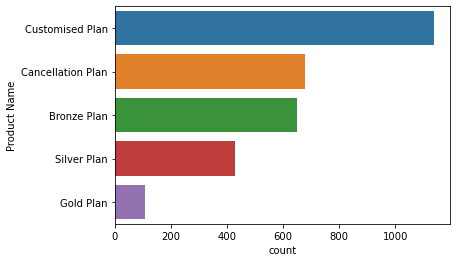

In [8]:
sns.countplot(y=data['Product Name'])

<AxesSubplot:xlabel='Age'>

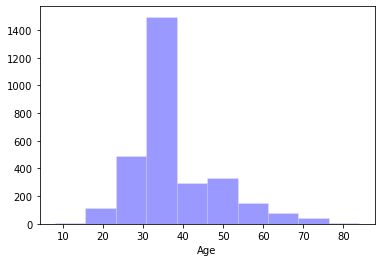

In [9]:
sns.distplot(data["Age"],bins = 10,kde = False,color = 'b',hist_kws = {'linewidth' : 0.5,'edgecolor' : 'white'})

<AxesSubplot:xlabel='count', ylabel='Product Name'>

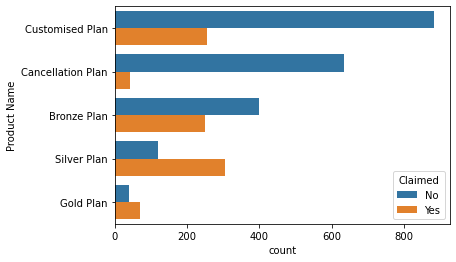

In [10]:
sns.countplot(y=data['Product Name'],hue=data['Claimed'])

<AxesSubplot:xlabel='count', ylabel='Agency_Code'>

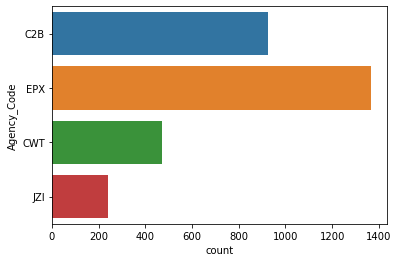

In [13]:
sns.countplot(y=data['Agency_Code'])

<AxesSubplot:xlabel='count', ylabel='Agency_Code'>

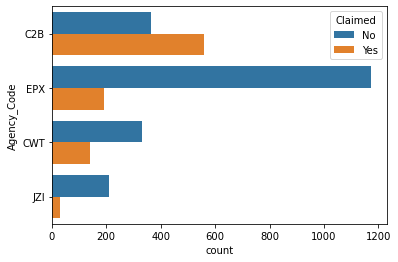

In [11]:
sns.countplot(y=data['Agency_Code'],hue=data['Claimed'])

### Observations

- Though most of the customers prefer customized plan but the claim is high for silver plan opted customers.

- Customers through C2B agency claim highest and for JZI claim the least.

- Most of the customers who travel are in the age group of 30 to 40.

### Checking for Outliers

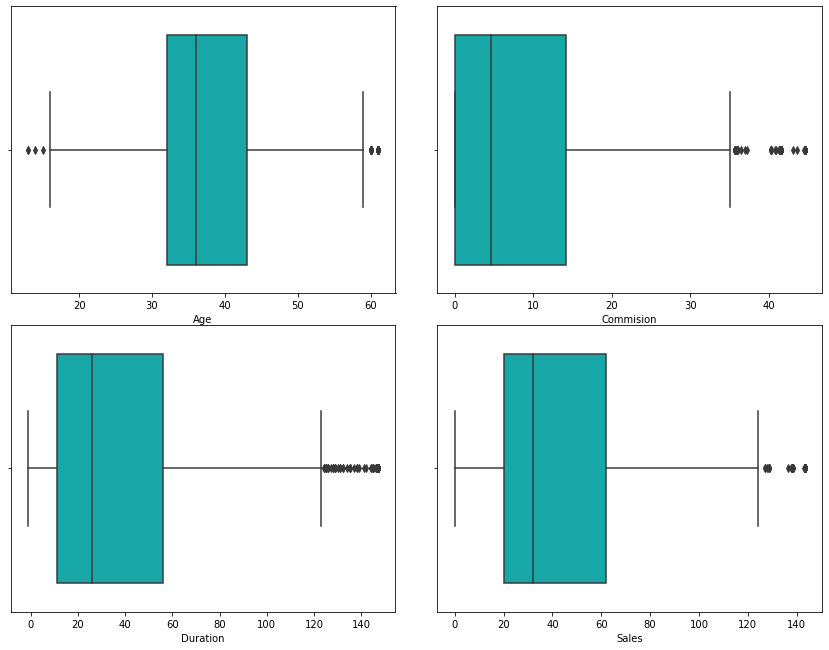

In [711]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize= (12,9))
fig.tight_layout()

sns.boxplot(data['Age'],ax = ax[0][0],color='c')

sns.boxplot(data['Commision'],ax = ax[0][1],color='c')

sns.boxplot(data['Duration'],ax = ax[1][0],color='c')

sns.boxplot(data['Sales'],ax = ax[1][1],color='c');



#### Outliers exists for all the continuous variables, and also has many outliers.

Outliers are not treated here because it is observed that CART and RF model come out as overfit if it is treated. Hence it is kept the data as it is.

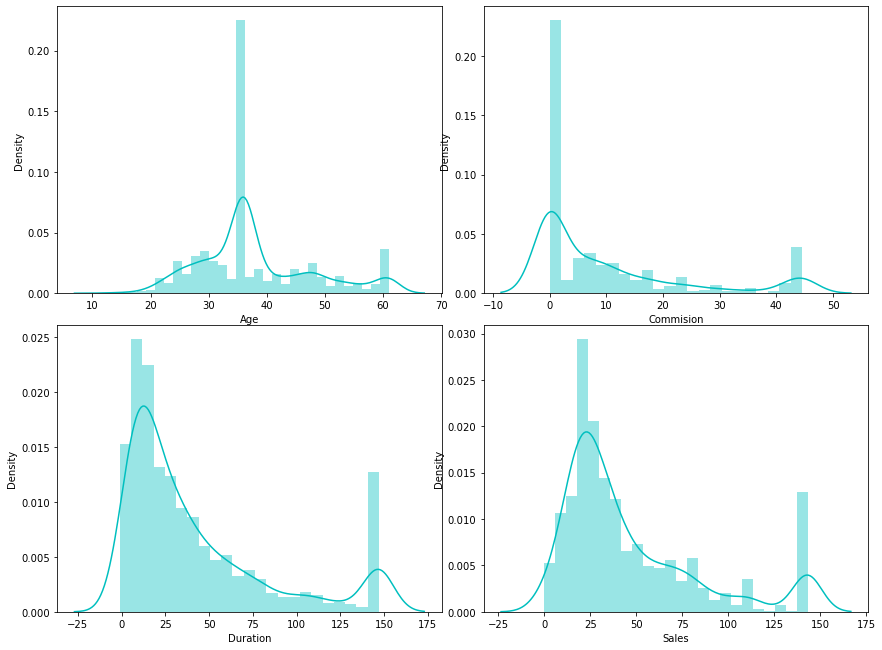

In [712]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize= (12,9))
fig.tight_layout()

sns.distplot(data['Age'],ax = ax[0][0],color='c')

sns.distplot(data['Commision'],ax = ax[0][1],color='c')

sns.distplot(data['Duration'],ax = ax[1][0],color='c')

sns.distplot(data['Sales'],ax = ax[1][1],color='c');

In [713]:
#check skewness
print("skewness in age",data['Age'].skew())

print("skewness in Commission",data['Commision'].skew())

print("skewness in Duration",data['Duration'].skew())

print("skewness in Sales",data['Sales'].skew())

skewness in age 0.7237153953968645
skewness in Commission 1.4543037430783454
skewness in Duration 1.4054501288866224
skewness in Sales 1.357696730110924


### Checking pairwise distribution of the continuous variables


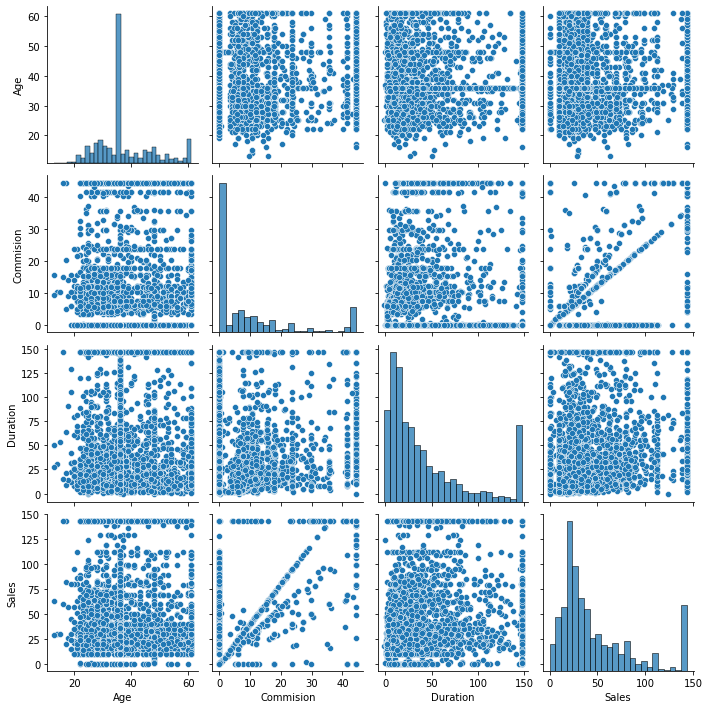

In [714]:
sns.pairplot(data[['Age', 'Commision', 'Duration','Sales']])

### Checking for Correlations



In [32]:
#checking correlation between variables
corr=data.corr()
corr


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000000,0.025578,-0.045517,-0.035147,0.064759,-0.067835,0.027457,0.036187,0.018982,0.000509
Agency_Code,0.025578,1.000000,0.538522,-0.415696,-0.379929,0.019136,-0.226402,-0.332392,-0.381980,0.105039
Type,-0.045517,0.538522,1.000000,-0.327056,-0.198136,-0.104953,-0.183044,-0.236585,-0.002306,0.337526
Claimed,-0.035147,-0.415696,-0.327056,1.000000,0.282892,-0.013734,0.200737,0.334581,0.255101,-0.034892
Commision,0.064759,-0.379929,-0.198136,0.282892,1.000000,0.036653,0.462114,0.762181,0.397237,0.177611
Channel,-0.067835,0.019136,-0.104953,-0.013734,0.036653,1.000000,-0.017588,0.040674,-0.037714,0.038131
Duration,0.027457,-0.226402,-0.183044,0.200737,0.462114,-0.017588,1.000000,0.549889,0.349473,-0.026677
Sales,0.036187,-0.332392,-0.236585,0.334581,0.762181,0.040674,0.549889,1.000000,0.471726,0.086495
Product Name,0.018982,-0.381980,-0.002306,0.255101,0.397237,-0.037714,0.349473,0.471726,1.000000,0.020422
Destination,0.000509,0.105039,0.337526,-0.034892,0.177611,0.038131,-0.026677,0.086495,0.020422,1.000000


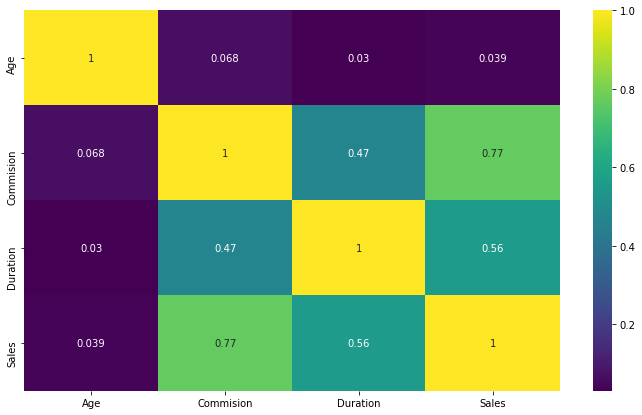

In [716]:
plt.figure(figsize=(12,7))
sns.heatmap(data_df.corr(),annot=True,cmap='viridis')
plt.show()

#### There is not much high correlation between the variables except the 'Sales' and 'Commission' variable.

In [717]:
data.head()

,Age,Type,Commision,Duration,Sales,Product Name,Destination
0,48.0,0,0.70,7.0,2.51,2,0
1,36.0,1,0.00,34.0,20.00,2,0
2,39.0,1,5.94,3.0,9.90,2,1
3,36.0,1,0.00,4.0,26.00,1,0
4,33.0,0,6.30,53.0,18.00,0,0


### Proportion of observations in Target classes

In [9]:
# Get the proportions
data['Claimed'].value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

## Data Splitting: Splitting the data into test and train, building classification model CART, Random Forest, Artificial Neural Network

### Extracting the target column into separate vectors for training set and test set

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
#Extract x and y
X = data.drop("Claimed" , axis=1)
y = data.pop("Claimed")

### Splitting data into training and test set

In [126]:
# splitting data into training and test set for independent attributes
# split data into 70% training and 30% test data
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data 

In [66]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2002+859)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)
Total Obs 2861


## Decision Tree Classifier

In [127]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [20,30,40,50],
    'min_samples_split': [60,90,120]
    
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [129]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [20, 30, 40, 50],
                         'min_samples_split': [60, 90, 120]})

In [130]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 120}

In [131]:
best_grid1 = grid_search.best_estimator_

### Generating Tree

In [619]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid1, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

### Variable Importance

In [75]:
print(
    pd.DataFrame(best_grid1.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.579301
Sales         0.294225
Product Name  0.045689
Commision     0.043732
Destination   0.020055
Duration      0.016999
Age           0.000000
Type          0.000000
Channel       0.000000


### Predicting on Training and Test dataset

In [18]:
ytrain_predict1 = best_grid1.predict(X_train)
ytest_predict1 = best_grid1.predict(X_test)

In [20]:
print('ytrain_predict',ytrain_predict1.shape)
print('ytest_predict',ytest_predict1.shape)

ytrain_predict (2002,)
ytest_predict (859,)


## Random Forest Classifier

In [144]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4],
    'max_features': [6],
    'min_samples_leaf': [30],
    'min_samples_split': [60],
    'n_estimators': [101]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [145]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4], 'max_features': [6],
                         'min_samples_leaf': [30], 'min_samples_split': [60],
                         'n_estimators': [101]})

In [146]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 6,
 'min_samples_leaf': 30,
 'min_samples_split': 60,
 'n_estimators': 101}

In [147]:
best_grid2 = grid_search.best_estimator_

In [148]:
ytrain_predict2 = best_grid2.predict(X_train)
ytest_predict2 = best_grid2.predict(X_test)

In [149]:
print('ytrain_predict',ytrain_predict2.shape)
print('ytest_predict',ytest_predict2.shape)

ytrain_predict (2002,)
ytest_predict (859,)


### Variable Importance

In [55]:
print(
    pd.DataFrame(best_grid2.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.328469
Sales         0.205119
Product Name  0.165179
Commision     0.101712
Duration      0.098500
Age           0.070901
Type          0.014715
Destination   0.014161
Channel       0.001244


## MLP Classifier (Artificial Neural Network)

In [150]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [151]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [50,100,150],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01],
    'max_iter' : [250,500,750]
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [152]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [50, 100, 150],
                         'max_iter': [250, 500, 750], 'solver': ['sgd', 'adam'],
                         'tol': [0.01]})

In [153]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 150,
 'max_iter': 250,
 'solver': 'adam',
 'tol': 0.01}

In [154]:
best_grid3 = grid_search.best_estimator_

In [155]:
ytrain_predict3 = best_grid3.predict(X_trains)
ytest_predict3 = best_grid3.predict(X_tests)

## Performance Metrics: Checking the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

## Decision Tree Model Evaluation

In [21]:
import matplotlib.pyplot as plt

### AUC and ROC for the training data

AUC: 0.810


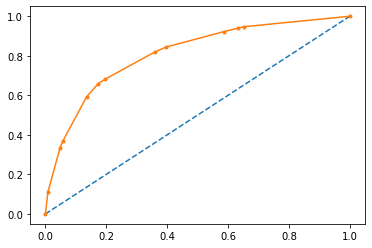

In [197]:
# predict probabilities
probs = best_grid1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
dt_auc_train = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % dt_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
dt_train_fpr, dt_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_train_fpr, dt_train_tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.803


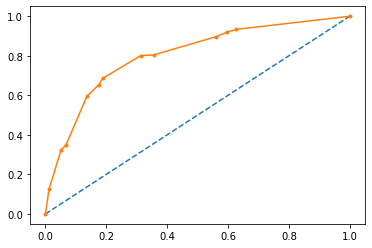

In [198]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_auc_test = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % dt_auc_test)
# calculate roc curve
dt_test_fpr, dt_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_test_fpr, dt_test_tpr, marker='.')
# show the plot
plt.show()

In [134]:
ytrain_predict1 = best_grid1.predict(X_train)
ytest_predict1 = best_grid1.predict(X_test)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix

### Confusion Matrix for the training data

In [136]:
confusion_matrix(train_labels, ytrain_predict1)

array([[1175,  184],
       [ 262,  381]], dtype=int64)

In [191]:
#Train Data Accuracy
dt_test_acc=best_grid1.score(X_train,train_labels) 
dt_test_acc

0.7772227772227772

### Classification report for the training data

In [138]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1359
           1       0.67      0.59      0.63       643

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.77      0.78      0.77      2002



In [139]:
cart_metrics=classification_report(train_labels, ytrain_predict1,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


### Confusion Matrix for test data

In [140]:
confusion_matrix(test_labels, ytest_predict1)

array([[508,  80],
       [110, 161]], dtype=int64)

In [190]:
#Test Data Accuracy
dt_train_acc=best_grid1.score(X_test,test_labels)
dt_train_acc

0.7788125727590222

### Classification report for the testing data


In [142]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       588
           1       0.67      0.59      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.77      0.78      0.78       859



In [143]:
cart_metrics=classification_report(test_labels, ytest_predict1,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.67
cart_test_recall  0.59
cart_test_f1  0.63


## Random Forest Model Evaluation

### AUC and ROC for the training data

AUC: 0.822


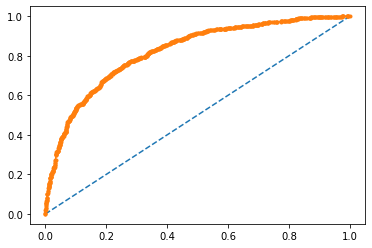

In [199]:
# predict probabilities
probs = best_grid2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_auc_train = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.818


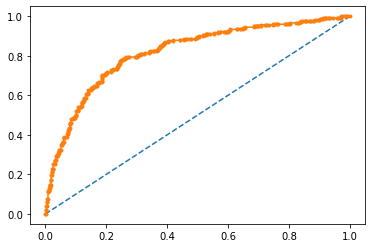

In [200]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_auc_test = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_auc_test)
# calculate roc curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
# show the plot
plt.show()

In [158]:
ytrain_predict2 = best_grid2.predict(X_train)
ytest_predict2 = best_grid2.predict(X_test)

In [159]:
from sklearn.metrics import classification_report,confusion_matrix

### Confusion Matrix for the training data

In [160]:
confusion_matrix(train_labels, ytrain_predict2)

array([[1194,  165],
       [ 285,  358]], dtype=int64)

In [189]:
#Train Data Accuracy
rf_train_acc=best_grid2.score(X_train,train_labels) 
rf_train_acc

0.7752247752247752

### Classification report for the training data

In [162]:
print(classification_report(train_labels, ytrain_predict2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1359
           1       0.68      0.56      0.61       643

    accuracy                           0.78      2002
   macro avg       0.75      0.72      0.73      2002
weighted avg       0.77      0.78      0.77      2002



In [163]:
rf_metrics=classification_report(train_labels, ytrain_predict2,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.68
rf_train_recall  0.56
rf_train_f1  0.61


### Confusion Matrix for test data

In [164]:
confusion_matrix(test_labels, ytest_predict2)

array([[518,  70],
       [123, 148]], dtype=int64)

In [188]:
#Test Data Accuracy
rf_test_acc=best_grid2.score(X_test,test_labels)
rf_test_acc

0.7753201396973225

### Classification report for the testing data

In [166]:
print(classification_report(test_labels, ytest_predict2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       588
           1       0.68      0.55      0.61       271

    accuracy                           0.78       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



In [167]:
rf_metrics=classification_report(test_labels, ytest_predict2,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.55
rf_test_f1  0.61


## ANN Model Evaluation

### AUC and ROC for the training data

AUC: 0.721


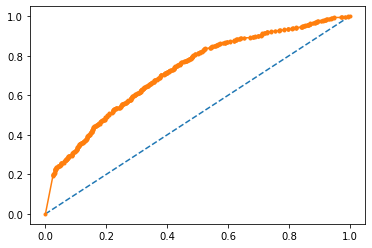

In [201]:
# predict probabilities
probs = best_grid3.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_auc_train = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % nn_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_train_fpr, nn_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_train_fpr, nn_train_tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the testing data

AUC: 0.803


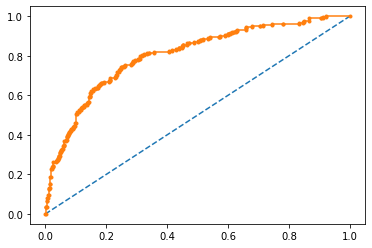

In [202]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid3.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nn_auc_test = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % nn_auc_test)
# calculate roc curve
nn_test_fpr, nn_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_test_fpr, nn_test_tpr, marker='.')
# show the plot
plt.show()

In [175]:
ytrain_predict3 = best_grid3.predict(X_train)
ytest_predict3 = best_grid3.predict(X_test)

In [176]:
from sklearn.metrics import classification_report,confusion_matrix

### Confusion Matrix for the training data

In [177]:
confusion_matrix(train_labels, ytrain_predict3)

array([[742, 617],
       [147, 496]], dtype=int64)

In [187]:
#Train Data Accuracy
nn_train_acc=best_grid3.score(X_train,train_labels) 
nn_train_acc

0.6183816183816184

### Classification report for the training data

In [179]:
print(classification_report(train_labels, ytrain_predict3))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66      1359
           1       0.45      0.77      0.56       643

    accuracy                           0.62      2002
   macro avg       0.64      0.66      0.61      2002
weighted avg       0.71      0.62      0.63      2002



In [183]:
nn_metrics=classification_report(train_labels, ytrain_predict3,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.45
nn_train_recall  0.77
nn_train_f1  0.56


### Confusion Matrix for test data

In [180]:
confusion_matrix(test_labels, ytest_predict3)

array([[320, 268],
       [ 67, 204]], dtype=int64)

In [186]:
#Test Data Accuracy
nn_test_acc=best_grid3.score(X_test,test_labels)

nn_test_acc

0.610011641443539

### Classification report for the testing data

In [182]:
print(classification_report(test_labels, ytest_predict3))

              precision    recall  f1-score   support

           0       0.83      0.54      0.66       588
           1       0.43      0.75      0.55       271

    accuracy                           0.61       859
   macro avg       0.63      0.65      0.60       859
weighted avg       0.70      0.61      0.62       859



In [185]:
nn_metrics=classification_report(test_labels, ytest_predict3,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.43
nn_test_recall  0.75
nn_test_f1  0.55


## 2.4 Final Model: Comparing all the models 

# Cart Conclusion

<b>Train Data:</b>  
    AUC: 81%        
    Accuracy: 78%             
    Precision: 67% \
    Recall: 59% \
    f1-Score: 63%       
            
<b>Test Data:</b>      
    AUC: 80%      
    Accuracy: 78%         
    Precision: 67% \
    Recall: 59% \
    f1-Score: 63% 

# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 82%        
    Accuracy: 78%             
    Precision: 68% \
    Recall: 56% \
    f1-Score: 61%       
            
<b>Test Data:</b>      
    AUC: 81%      
    Accuracy: 78%         
    Precision: 68% \
    Recall: 55% \
    f1-Score: 61% 

# ANN Conclusion

<b>Train Data:</b>  
    AUC: 72%        
    Accuracy: 62%             
    Precision: 45% \
    Recall: 77% \
    f1-Score: 56%       
            
<b>Test Data:</b>      
    AUC: 80%      
    Accuracy: 61%         
    Precision: 43% \
    Recall: 75% \
    f1-Score: 55% 

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [207]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data_obs = pd.DataFrame({'CART Train':[dt_train_acc,dt_auc_train,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[dt_test_acc,dt_auc_test,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_auc_train,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_auc_test,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_auc_train,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_auc_test,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data_obs,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.78,0.78,0.62,0.61
AUC,0.81,0.80,0.82,0.82,0.72,0.80
Recall,0.59,0.59,0.56,0.55,0.77,0.75
Precision,0.67,0.67,0.68,0.68,0.45,0.43
F1 Score,0.63,0.63,0.61,0.61,0.56,0.55


## ROC Curve for the 3 models on the Train data

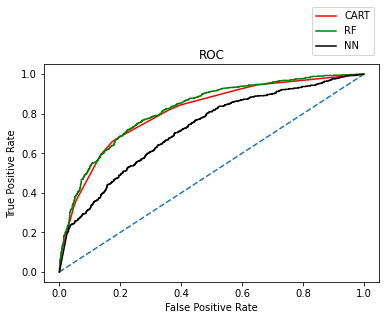

In [203]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr, dt_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

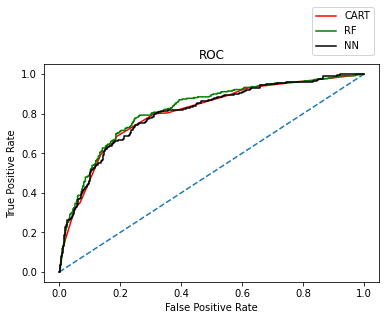

In [204]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_test_fpr, dt_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

From above graphs a final conclusion can be drawn that Random forest model is performing best on this dataset with recall of 55% and having AUC 82% for training and 81% for testing data.

## Business insights and recommendations

The above build model is capable enough to predict the claim with recall of 0.55 with 68% precision. 

- Revisit the silver plan as claim rate is high for it though most of the customers prefer customized plan.

- Claim through C2B agency is highest whereas most of the customers are from EPX agency.

Few more things can be considered to grow better are suggested below.

- Airport codes: 

Knowing both the origin and destination of a trip can help determine what coverage may be needed for common events at airports. 

- The number of people traveling:

The bigger the group, the greater the chance of a cancellation or trip interruption. The right travel insurance policy can protect against those losses.

- Reason for travel:

Business travelers often have different needs than leisure travelers. They may require coverage for the business equipment and devices they are carrying.

- One way, round-trip or multi-city trips:

One-way trips may not require post-departure benefits, such as emergency medical coverage. Itineraries with multiple stops are more likely to experience delays and baggage issues.